In [1]:
import os
print(os.getcwd())

/Users/snowy/Downloads


In [301]:
import pandas as pd
pd.set_option('display.max_columns', None)

data = pd.read_csv('DataCoSupplyChainDataset.csv', encoding='latin1')
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [304]:
(data['Order Status'] == 'SUSPECTED_FRAUD').value_counts(normalize=True)

Order Status
False    0.977498
True     0.022502
Name: proportion, dtype: float64

In [308]:
(data['Type'] == 'TRANSFER').value_counts()

Type
False    130636
True      49883
Name: count, dtype: int64

In [183]:
data.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [83]:
data.shape

(180519, 53)

In [4]:
#pd.reset_option('all')
data.isna().sum()[data.isna().sum() > 0]

Customer Lname              8
Customer Zipcode            3
Order Zipcode          155679
Product Description    180519
dtype: int64

In [231]:
missing_cols = ['Order Zipcode', 'Product Description']
df = data.drop(columns=missing_cols, axis=1)

In [232]:
df['Customer Zipcode'] =  df['Customer Zipcode'].fillna(0)

In [233]:
df['Customer Full Name'] = df['Customer Fname'].astype(str) + df['Customer Lname'].astype(str)

In [234]:
df['Product Status'].value_counts()

Product Status
0    180519
Name: count, dtype: int64

In [228]:
data['order date (DateOrders)'].value_counts()

order date (DateOrders)
12/14/2016 12:29    5
2/22/2015 14:38     5
2/17/2016 14:08     5
12/31/2016 9:50     5
2/11/2016 16:35     5
                   ..
9/5/2016 5:58       1
9/6/2016 1:56       1
9/6/2016 3:20       1
9/6/2016 19:27      1
1/17/2016 5:56      1
Name: count, Length: 65752, dtype: int64

In [235]:
redundant_cols = ['Customer Email', 'Customer Password', 'Customer Street', 'Department Id', 'Product Image', 'Product Status', 'Customer Fname', 'Customer Lname', 'Latitude', 'Longitude', 'shipping date (DateOrders)']
df = df.drop(columns=redundant_cols, axis=1)

In [236]:
numerical_features = [f for f in df.columns if df[f].dtypes!='O']
cat_features = [c for c in df.columns if df[c].dtypes=='O']
print("Numerical: ",numerical_features)
print("Categorical: ",cat_features)

Numerical:  ['Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer', 'Late_delivery_risk', 'Category Id', 'Customer Id', 'Customer Zipcode', 'Order Customer Id', 'Order Id', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Product Card Id', 'Product Category Id', 'Product Price']
Categorical:  ['Type', 'Delivery Status', 'Category Name', 'Customer City', 'Customer Country', 'Customer Segment', 'Customer State', 'Department Name', 'Market', 'Order City', 'Order Country', 'order date (DateOrders)', 'Order Region', 'Order State', 'Order Status', 'Product Name', 'Shipping Mode', 'Customer Full Name']


In [237]:
#df["order date (DateOrders)"] = pd.to_datetime(df["order date (DateOrders)"])

df['order_year'] = pd.DatetimeIndex(df['order date (DateOrders)']).year
df['order_month'] = pd.DatetimeIndex(df['order date (DateOrders)']).month
df['order_hour'] = pd.DatetimeIndex(df['order date (DateOrders)']).hour

In [12]:
# df = df.drop('order date (DateOrders)', axis=1)

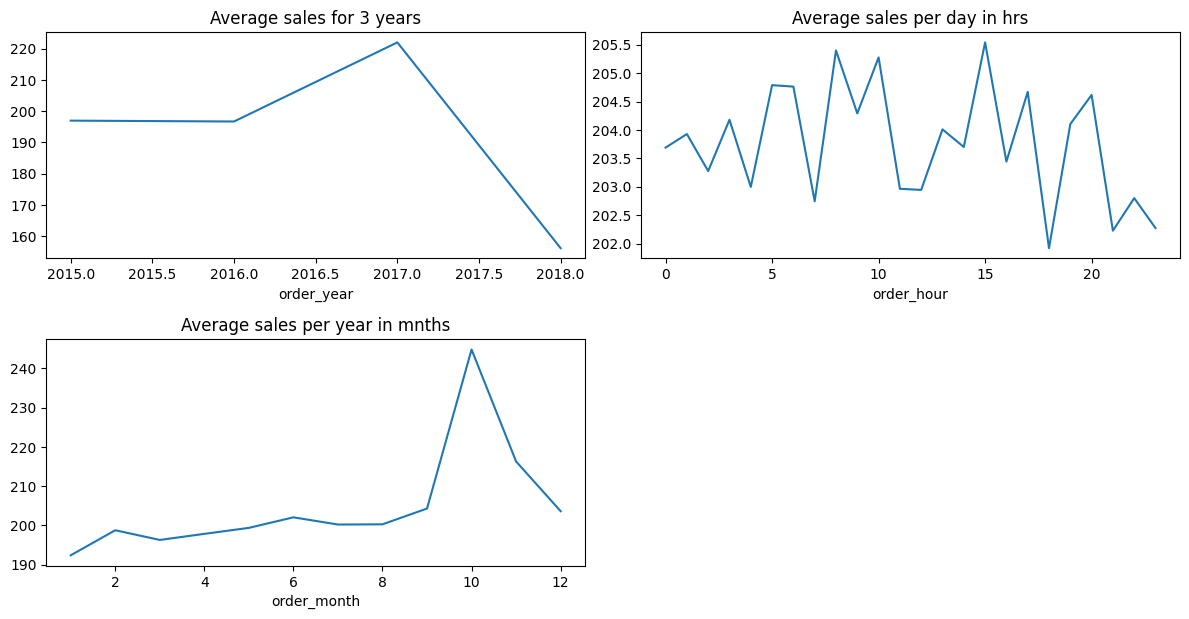

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,12))
plt.subplot(4, 2, 1)
quater = df.groupby('order_year')
quater['Sales'].mean().plot(figsize=(12,12),title='Average sales for 3 years')
plt.subplot(4, 2, 2)
hrs = df.groupby("order_hour")
hrs['Sales'].mean().plot(figsize=(12,12),title='Average sales per day in hrs')
plt.subplot(4, 2, 3)
mnth = df.groupby("order_month")
mnth['Sales'].mean().plot(figsize=(12,12),title='Average sales per year in mnths')

plt.tight_layout()
plt.show()

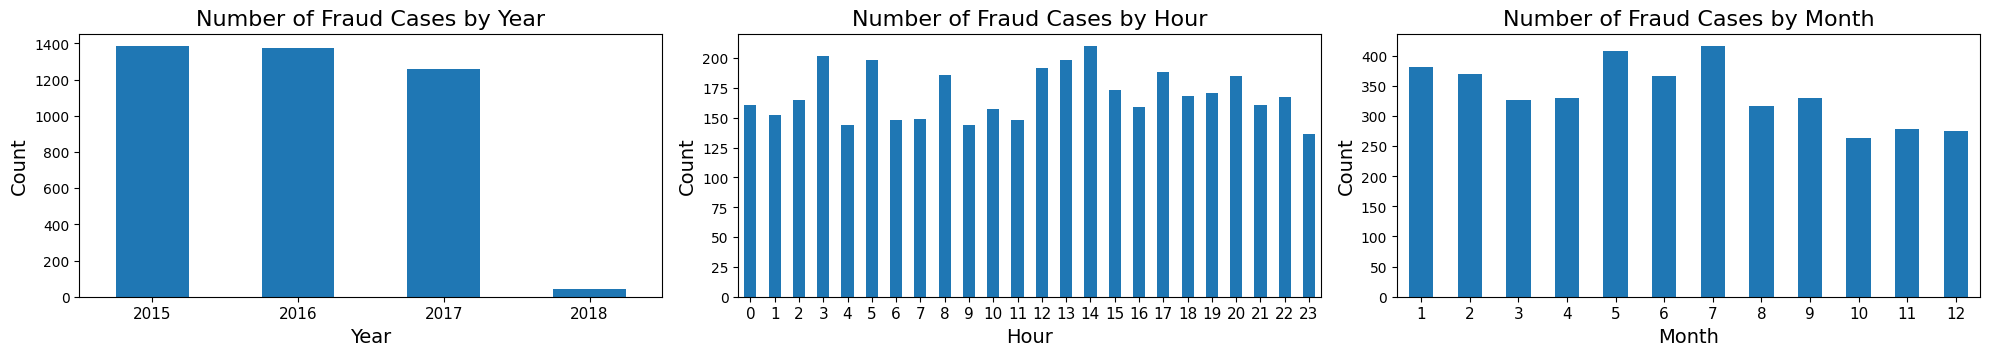

In [265]:
import matplotlib.pyplot as plt

# Filter for suspected fraud cases
fraud_cases = df[df['Order Status'] == 'SUSPECTED_FRAUD']

plt.figure(figsize=(20, 13))

plt.subplot(4, 3, 1)
fraud_yearly = fraud_cases.groupby('order_year')['Order Status'].count()
fraud_yearly.plot(kind='bar', title='Number of Fraud Cases by Year', xlabel='Year', ylabel='Count')
plt.title('Number of Fraud Cases by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=11) 

plt.subplot(4, 3, 2)
fraud_hourly = fraud_cases.groupby('order_hour')['Order Status'].count()
fraud_hourly.plot(kind='bar', title='Number of Fraud Cases by Hour', xlabel='Hour', ylabel='Count')
plt.title('Number of Fraud Cases by Hour', fontsize=16)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=11) 

plt.subplot(4, 3, 3)
fraud_monthly = fraud_cases.groupby('order_month')['Order Status'].count()
fraud_monthly.plot(kind='bar', title='Number of Fraud Cases by Month', xlabel='Month', ylabel='Count')
plt.title('Number of Fraud Cases by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=11) 

plt.tight_layout()
plt.show()

In [14]:
import plotly.express as px

market = df.groupby('Market')
region = df.groupby('Order Region')

fig1 = px.bar(
    market['Sales per customer'].sum().sort_values(ascending=False).reset_index(),
    x='Market',
    y='Sales per customer',
    title="Total sales for all markets",
    labels={'Sales per customer': 'Total Sales'},
    template='plotly_dark',
    width=600,
    height=400
)
fig1.show()

region_sales_per_customer = region['Sales per customer'].sum().sort_values(ascending=False).reset_index()

fig2 = px.bar(
    region_sales_per_customer,
    x='Order Region',
    y='Sales per customer',
    title="Total sales for all regions",
    labels={'Sales per customer': 'Total Sales'},
    template='plotly_dark',
    width=600,
    height=400
)
fig2.show()

In [15]:
grouped_data = df.groupby('Category Name')['Sales'].sum().reset_index()
fig = px.bar(grouped_data, x='Category Name', y='Sales', title='Aggregate Sales by Category', template='plotly_dark', width=600, height=400)
fig.show()

In [16]:
fraud_data = df[(df['Order Status'] == 'SUSPECTED_FRAUD') & (df['Type'] == 'TRANSFER')]

fraud_by_region = fraud_data['Order Region'].value_counts().reset_index()
fraud_by_region.columns = ['Order Region', 'Count']
fraud_by_region = fraud_by_region.sort_values(by='Count', ascending=False)

fig = px.bar(
    fraud_by_region,
    x='Order Region',
    y='Count',
    title='Regions with Highest Fraud',
    labels={'Order Region': 'Region', 'Count': 'Fraud Count'},
    template='plotly_dark',
    width=600,
    height=400
)

fig.show()

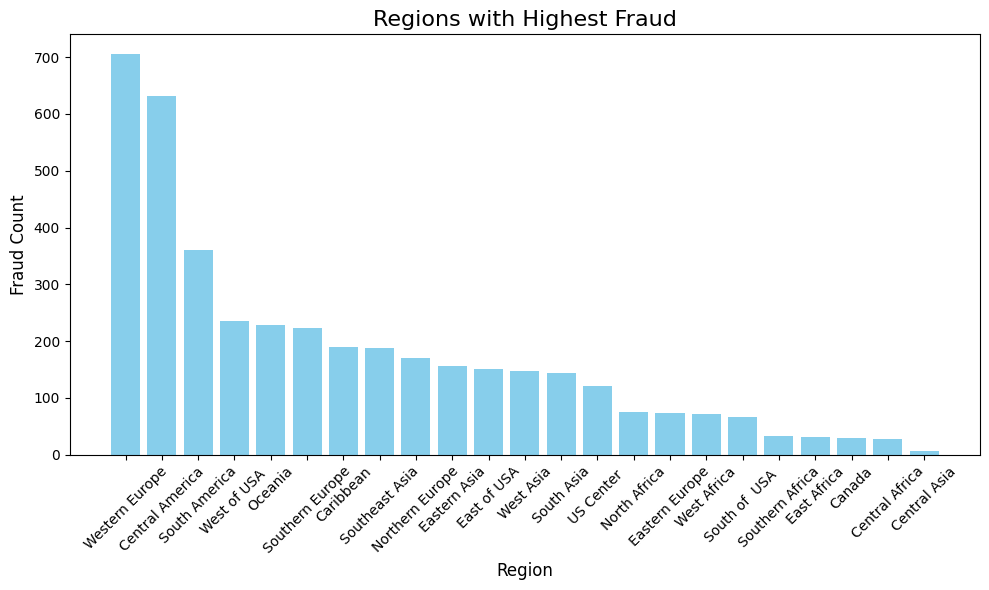

In [256]:
import matplotlib.pyplot as plt

# Filter data for fraud cases in TRANSFER type
fraud_data = df[(df['Order Status'] == 'SUSPECTED_FRAUD') & (df['Type'] == 'TRANSFER')]

# Count fraud cases by region
fraud_by_region = fraud_data['Order Region'].value_counts().reset_index()
fraud_by_region.columns = ['Order Region', 'Count']
fraud_by_region = fraud_by_region.sort_values(by='Count', ascending=False)

# Plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(fraud_by_region['Order Region'], fraud_by_region['Count'], color='skyblue')

# Add titles and labels
plt.title('Regions with Highest Fraud', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Fraud Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent overlap

# Show the plot
plt.show()

In [179]:
suspected_fraud_data = df[df['Order Status'] == 'SUSPECTED_FRAUD']
print(suspected_fraud_data['Customer Id'].value_counts().nlargest(10).reset_index())
print(suspected_fraud_data['Customer Full Name'].value_counts().nlargest(10).reset_index())

   Customer Id  count
0        11584     12
1         9002     10
2         9010     10
3         9819     10
4         5674      9
5         1464      9
6         4683      9
7         6143      9
8         3569      9
9         3420      9
  Customer Full Name  count
0          MarySmith    528
1        RobertSmith     28
2         JamesSmith     23
3         DavidSmith     20
4      JonathanSmith     18
5         HenrySmith     16
6         MaryTorres     15
7        DanielSmith     15
8          MaryJones     14
9       BarbaraSmith     13


/var/folders/yp/_xstfn5s2nb1lmynh4_4ghmc0000gn/T/ipykernel_25770/599556367.py:10: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, '0'), Text(1, 0, '1')]

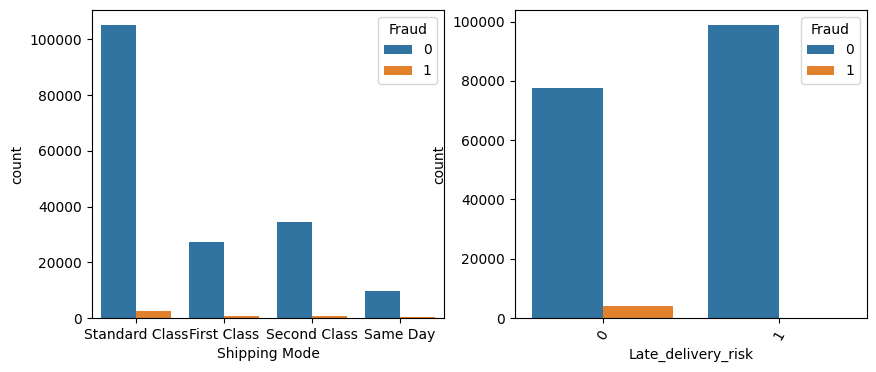

In [293]:
import seaborn as sns 

temp_df = df
temp_df['Fraud'] = (temp_df['Order Status'] == 'SUSPECTED_FRAUD').astype(int)

f, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=False)

sns.countplot(x="Shipping Mode", hue="Fraud", data=temp_df, ax=axes[0])
ax = sns.countplot(x="Late_delivery_risk", hue="Fraud", data=temp_df, ax=axes[1])
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

<Axes: xlabel='Type', ylabel='count'>

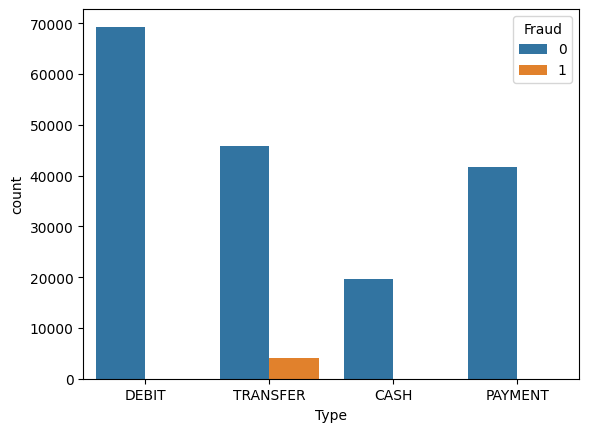

In [294]:
sns.countplot(x="Type", hue="Fraud", data=temp_df)

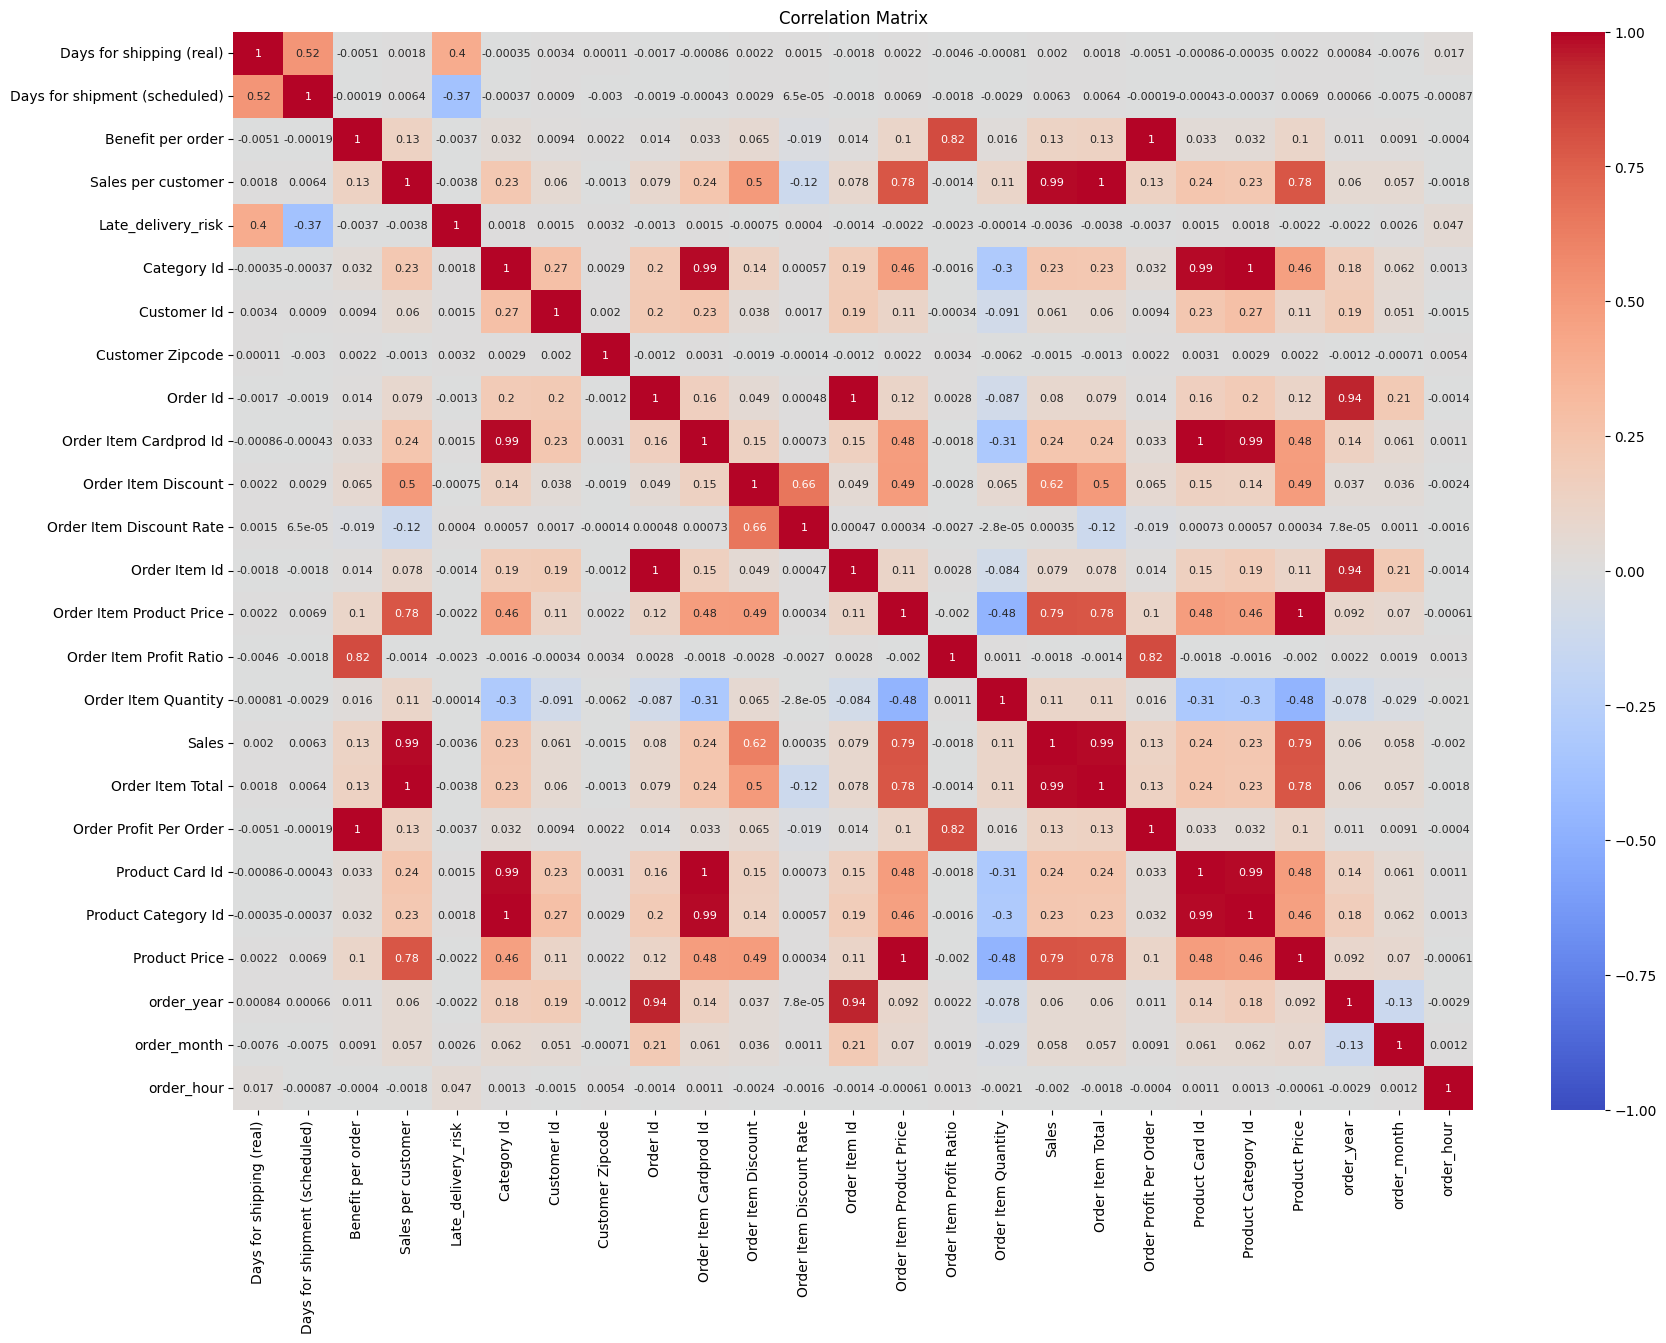

In [18]:
import seaborn as sns

df_numeric = df.select_dtypes(include='number')

corr_matrix = df_numeric.corr()

plt.figure(figsize=(20, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 8})
plt.title('Correlation Matrix')
plt.show()

Customer Id 1.0 Order Customer Id 1.0

Sales per customer 1.0 Order Item Total 1.0

Benefit per order 1.0 Order Profit Per Order 1.0

Order Item Cardprod Id 1.0 Product Card Id 1.0

Category Id 1.0 Product Category Id 1.0

Order Item Product Price 1.0 Product Price 1.0

Order Item Id 1.0 Order Id 1.0

In [189]:
print(df['Order Item Id'].nunique())
print(df['Order Id'].nunique())

180519
65752


In [180]:
print(df['Order Customer Id'].nunique())
print(df['Customer Id'].nunique())

20652
20652


In [190]:
print((df['Benefit per order'] == df['Order Profit Per Order']).all()) #drop 'Benefit per order'
print((df['Sales per customer'] == df['Order Item Total']).all()) #drop 'Sales per customer'
print((df['Product Price'] == df['Order Item Product Price']).all()) # drop 'Order Item Product Price'
print((df['Customer Id'] == df['Order Customer Id']).all()) # drop Order Customer Id
print((df['Category Id'] == df['Product Category Id']).all()) #drop Category Id
print((df.groupby('Product Category Id')['Category Name'].nunique()== 1).all()) #drop 'Product Category Id'
print((df.groupby('Product Name')['Product Card Id'].nunique()== 1).all()) #drop 'Product Card Id'
print((df.groupby('Order Item Cardprod Id')['Product Name'].nunique()== 1).all()) #drop 'Order Item Cardprod Id'

True
True
True
True
True
True
True
True


In [191]:
correlated_cols = ["Benefit per order", "Sales per customer", "Order Item Product Price", "Order Item Cardprod Id", "Product Category Id", 'Product Card Id', 'Customer Id', 'Category Id']
df = df.drop(correlated_cols ,axis=1)

In [192]:
df['Type'].value_counts()

Type
DEBIT       69295
TRANSFER    49883
PAYMENT     41725
CASH        19616
Name: count, dtype: int64

In [22]:
df['Order Status'].value_counts()

Order Status
COMPLETE           59491
PENDING_PAYMENT    39832
PROCESSING         21902
PENDING            20227
CLOSED             19616
ON_HOLD             9804
SUSPECTED_FRAUD     4062
CANCELED            3692
PAYMENT_REVIEW      1893
Name: count, dtype: int64

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
cols = ['Order Item Discount', 'Order Item Discount Rate', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Product Price']
vif["columns"]= cols
vif["vif value"] = [variance_inflation_factor(df[cols].values, i) for i in range(len(vif["columns"]))]
vif.T

,0,1,2,3,4,5,6,7
columns,Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Price
vif value,389415821.949077,6.126471,3.410618,12.809224,25472272275.347256,20690128715.483124,3.413,24.873511


In [193]:
df = df.drop(['Order Item Total', 'Order Profit Per Order', 'Order Item Discount'], axis=1)

In [25]:
grouped_data = df.groupby('Type')['Order Status'].value_counts().reset_index(name='Count')
print(grouped_data) # fraud only exist in transfer type

       Type     Order Status  Count
0      CASH           CLOSED  19616
1     DEBIT         COMPLETE  59491
2     DEBIT          ON_HOLD   9804
3   PAYMENT  PENDING_PAYMENT  39832
4   PAYMENT   PAYMENT_REVIEW   1893
5  TRANSFER       PROCESSING  21902
6  TRANSFER          PENDING  20227
7  TRANSFER  SUSPECTED_FRAUD   4062
8  TRANSFER         CANCELED   3692


# Filter dataset down to Transfer Type

In [212]:
df_transfer = df[df['Type'] == 'TRANSFER'].copy()

In [195]:
df_transfer['Order Status'].value_counts()

Order Status
PROCESSING         21902
PENDING            20227
SUSPECTED_FRAUD     4062
CANCELED            3692
Name: count, dtype: int64

In [213]:
df_transfer['Fraud'] = (df_transfer['Order Status'] == 'SUSPECTED_FRAUD').astype(int)
df_transfer = df_transfer.drop('Order Status', axis=1)

In [364]:
df_transfer['Fraud'].sum() / df_transfer.shape[0]

0.08143054748110579

In [214]:
import numpy as np

def add_features(df):
    df['Delivery Time Deviation'] = df['Days for shipping (real)'] - df['Days for shipment (scheduled)']
    df['Is Holiday Season'] = df['order_month'].isin([11, 12]).astype(int)
    df['Is Late Night Order'] = (df['order_hour'] < 6).astype(int)
    df['Discount-Profit Interaction'] = df['Order Item Discount Rate'] * df['Order Item Profit Ratio']
    return df

df_transfer = add_features(df_transfer)

In [215]:
#broader categorisation 
category_mapping = {
    'Golf Gloves': 'Sports', 'Golf Balls': 'Sports','Golf Shoes': 'Sports','Golf Apparel': 'Sports','Golf Bags & Carts': 'Sports',"Women's Golf Clubs": 'Sports',"Men's Golf Clubs": 'Sports',"Kids' Golf Clubs": 'Sports',
    'Camping & Hiking': 'Outdoor & Adventure','Fishing': 'Outdoor & Adventure','Hunting & Shooting': 'Outdoor & Adventure',
    'Electronics': 'Electronics','Consumer Electronics': 'Electronics','Computers': 'Electronics','Cameras ': 'Electronics','CDs ': 'Electronics','DVDs': 'Electronics',
    'Indoor/Outdoor Games': 'Games','Video Games': 'Games','Toys': 'Games',
    "Women's Apparel": 'Women',"Women's Clothing": 'Women','Health and Beauty': 'Women','Accessories': 'Women',
    "Men's Clothing": 'Men',"Men's Footwear": 'Men',
    "Children's Clothing": 'Kid',"Girls' Apparel": 'Kid',"Baby ":'Kid',"Kid": 'Kid',
    'Cleats': 'Sports','Boxing & MMA': 'Sports','Lacrosse': 'Sports','Hockey': 'Sports','Baseball & Softball': 'Sports','Sporting Goods': 'Sports','Basketball' : 'Sports','Water Sports': 'Sports', 'Tennis & Racquet': 'Sports','Shop By Sport': 'Sports','Soccer': 'Sports',
    'Strength Training': 'Fitness','Fitness Accessories': 'Fitness','Cardio Equipment': 'Fitness', 
    'Trade-In': 'Services',
    'Music': 'Hobbies','Garden': 'Hobbies','Crafts': 'Hobbies','Books ': 'Hobbies',
    'Pet Supplies': 'Pets',
}
df_transfer['Category Name'] = df_transfer['Category Name'].replace(category_mapping)

In [216]:
def drop_cols(df):
    df = df.drop(['order date (DateOrders)', 'Order Customer Id', 'Type'], axis=1)
    return df

df_transfer = drop_cols(df_transfer)

In [210]:
df_transfer.columns

Index(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Delivery Status', 'Late_delivery_risk', 'Category Name',
       'Customer City', 'Customer Country', 'Customer Segment',
       'Customer State', 'Customer Zipcode', 'Department Name', 'Market',
       'Order City', 'Order Country', 'Order Id', 'Order Item Discount Rate',
       'Order Item Id', 'Order Item Profit Ratio', 'Order Item Quantity',
       'Sales', 'Order Region', 'Order State', 'Product Name', 'Product Price',
       'Shipping Mode', 'Customer Full Name', 'order_year', 'order_month',
       'order_hour', 'Fraud', 'Delivery Time Deviation', 'Is Holiday Season',
       'Is Late Night Order', 'Discount-Profit Interaction'],
      dtype='object')

# Customer Profiling
skip this section (not using profiling in model features)

In [126]:
df_time = df_transfer.sort_values(by='order date (DateOrders)')

split_index = int(len(df_time) * 0.8)

# Split the data
train_set = df_time.iloc[:split_index]
test_set = df_time.iloc[split_index:]

In [127]:
date_min = train_set['order date (DateOrders)'].min()
date_max = train_set['order date (DateOrders)'].max()
print(f"Date range: {date_min} to {date_max}")

date_min = test_set['order date (DateOrders)'].min()
date_max = test_set['order date (DateOrders)'].max()
print(f"Date range: {date_min} to {date_max}")

Date range: 0 to 14753
Date range: 14753 to 18076


In [ ]:
# df = df.drop('order date (DateOrders)', axis=1)
# df = df.drop('Order Customer Id', axis=1)

In [128]:
orders_df = train_set.groupby(['Order Id', 'Order Customer Id'], as_index=False).agg({
    'Sales': 'sum'  # Total sales for each order
})

orders_df = orders_df.sort_values(by=['Order Customer Id', 'Order Id'])

orders_df['Cumulative Total Sales'] = orders_df.groupby('Order Customer Id')['Sales'].cumsum()
orders_df['Total Orders'] = orders_df.groupby('Order Customer Id').cumcount() + 1  # Count unique orders
orders_df['Average Order Value'] = orders_df['Cumulative Total Sales'] / orders_df['Total Orders']

train_set = pd.merge(train_set, orders_df[['Order Id', 'Cumulative Total Sales', 'Total Orders', 'Average Order Value']],
                     on='Order Id', 
                     how='left')

In [ ]:
orders_df = train_set.groupby(['Order Customer Id', 'Order Id'], as_index=False).agg({
    'order date (DateOrders)': 'min'  
})

orders_df = orders_df.sort_values(by=['Order Customer Id', 'order date (DateOrders)'])

orders_df['Last Order Date'] = orders_df.groupby('Order Customer Id')['order date (DateOrders)'].shift(1)

orders_df['Recency'] = (orders_df['order date (DateOrders)'] - orders_df['Last Order Date']).dt.days
orders_df['Last Order Date'] = orders_df['Last Order Date'].fillna(0)
orders_df['Recency'] = orders_df['Recency'].fillna(0)

train_data = pd.merge(train_set, orders_df[['Order Id', 'Recency']],
                     on='Order Id', 
                     how='left')

In [116]:
train_set.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Delivery Status', 'Late_delivery_risk', 'Category Id', 'Category Name',
       'Customer City', 'Customer Country', 'Customer Id', 'Customer Segment',
       'Customer State', 'Customer Zipcode', 'Department Name', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Discount Rate',
       'Order Item Id', 'Order Item Profit Ratio', 'Order Item Quantity',
       'Sales', 'Order Region', 'Order State', 'Product Card Id',
       'Product Name', 'Product Price', 'Shipping Mode', 'Customer Full Name',
       'order_year', 'order_month', 'order_hour', 'Fraud',
       'Delivery Time Deviation', 'Is Holiday Season', 'Is Late Night Order',
       'Discount-Profit Interaction', 'Quantity-Price Interaction',
       'Cumulative Total Sales', 'Total Orders', 'Average Order Value'],
      dtype='object')

In [129]:
customer_profiles = {}

for customer_id, group in train_set.groupby('Order Customer Id'):
    total_sales = group['Sales'].sum()
    total_orders = group['order date (DateOrders)'].nunique()  # Count unique orders
    last_order_date = group['order date (DateOrders)'].max()
    avg_sale_value = total_sales / total_orders

    # Store the profile in the dictionary
    customer_profiles[customer_id] = {
        'Total Sales': total_sales,
        'Total Orders': total_orders,
        'Average Order Value': avg_sale_value,
        'Last Order Date': last_order_date    
    }

In [130]:
def update_row(row, customer_profiles):
    customer_id = row['Order Customer Id']
    order_date = row['order date (DateOrders)']
    sales = row['Sales']

    if customer_id in customer_profiles:
        profile = customer_profiles[customer_id]
        cumulative_sales = profile['Total Sales'] + sales
        total_orders = profile['Total Orders'] + 1
        avg_order_value = cumulative_sales / total_orders
        recency = (order_date - profile['Last Order Date']).days

        # Update profile
        customer_profiles[customer_id]['Total Sales'] = cumulative_sales
        customer_profiles[customer_id]['Total Orders'] = total_orders
        customer_profiles[customer_id]['Average Order Value'] = avg_order_value
        customer_profiles[customer_id]['Last Order Date'] = order_date

        return pd.Series([cumulative_sales, total_orders, avg_order_value, recency])

    else:
        # New customer
        customer_profiles[customer_id] = {
            'Total Sales': sales,
            'Total Orders': 1,
            'Average Order Value': sales,
            'Last Order Date': order_date
        }
        return pd.Series([sales, 1, sales])

test_set[['Cumulative Total Sales', 'Total Orders', 'Average Order Value', 'Recency']] = test_set.apply(
    update_row, axis=1, customer_profiles=customer_profiles
)

/var/folders/yp/_xstfn5s2nb1lmynh4_4ghmc0000gn/T/ipykernel_25770/1014614759.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/yp/_xstfn5s2nb1lmynh4_4ghmc0000gn/T/ipykernel_25770/1014614759.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/yp/_xstfn5s2nb1lmynh4_4ghmc0000gn/T/ipykernel_25770/1014614759.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [131]:
y_train = train_set['Fraud'].astype(int)
y_test = test_set['Fraud'].astype(int)

In [132]:
def drop_cols(df):
    df = df.drop(['order date (DateOrders)', 'Order Customer Id', 'Fraud', 'Type'], axis=1)
    return df

X_train = drop_cols(train_set)
X_test = drop_cols(test_set)

In [109]:
cols = ['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Delivery Status', 'Late_delivery_risk', 'Category Name',
       'Customer City', 'Customer Country', 'Customer Segment',
       'Customer State', 'Customer Zipcode', 'Department Name', 'Market',
       'Order City', 'Order Country', 'Order Id', 'Order Item Discount Rate',
       'Order Item Id', 'Order Item Profit Ratio', 'Order Item Quantity',
       'Sales', 'Order Region', 'Order State', 'Product Name', 'Product Price',
       'Shipping Mode', 'Customer Full Name', 'order_year', 'order_month',
       'order_hour', 'Delivery Time Deviation', 'Is Holiday Season',
       'Is Late Night Order', 'Discount-Profit Interaction',
       'Cumulative Total Sales', 'Total Orders', 'Average Order Value']

diff1 = set(X_train.columns.tolist()) - set(cols)
print("In list1 but not in list2:", diff1)

In list1 but not in list2: {'Customer Id'}


In [133]:
from sklearn.preprocessing import LabelEncoder

combined_data = pd.concat([X_train, X_test], keys=['train', 'test'])

object_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = [f for f in X_train.columns if X_train[f].dtypes != 'O' and f != 'is_fraud']

le_dict = {} 

for col in object_cols:
    le = LabelEncoder()
    combined_data[col] = le.fit_transform(combined_data[col].astype(str))
    le_dict[col] = le 

X_train = combined_data.loc['train']
X_test = combined_data.loc['test']

In [134]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

/var/folders/yp/_xstfn5s2nb1lmynh4_4ghmc0000gn/T/ipykernel_25770/863517962.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/yp/_xstfn5s2nb1lmynh4_4ghmc0000gn/T/ipykernel_25770/863517962.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [135]:
X_test.columns == X_train.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [136]:
X_train

,Days for shipping (real),Days for shipment (scheduled),Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Zipcode,Department Name,Market,Order City,Order Country,Order Id,Order Item Discount Rate,Order Item Id,Order Item Profit Ratio,Order Item Quantity,Sales,Order Region,Order State,Product Card Id,Product Name,Product Price,Shipping Mode,Customer Full Name,order_year,order_month,order_hour,Delivery Time Deviation,Is Holiday Season,Is Late Night Order,Discount-Profit Interaction,Quantity-Price Interaction,Cumulative Total Sales,Total Orders,Average Order Value
0,-0.919113,-1.396936,-0.276668,1.026667,0.662379,-1.237276,0.571118,-0.789170,-0.626179,-0.866393,-1.623957,1.435879,-0.100900,-0.230919,1.277029,0.010677,-1.658652,-0.448016,-1.671845,0.749733,-0.774073,0.699773,-1.161054,-0.682543,0.742994,-1.567712,1.093252,-2.015093,-0.858126,-1.162388,-1.296877,-0.064376,0.287809,-0.456261,-0.582501,0.354788,0.699773,-1.098820,-0.624830,-1.217506
1,-0.919113,-0.672800,1.820335,-0.974025,0.786990,-0.603516,-0.797360,1.267155,-0.284109,-0.866393,0.753201,-0.937578,-0.100900,-0.230919,0.202829,0.933135,-1.658557,-0.022137,-1.671768,0.792753,-0.774073,1.437643,-1.161054,-0.851310,0.880341,-1.442040,1.789846,-0.208111,0.462834,-1.162388,-1.296877,0.080014,-0.384947,-0.456261,-0.582501,0.633753,1.437643,-0.302652,-0.624830,0.384485
2,-0.919113,-0.672800,1.820335,-0.974025,0.662379,-1.237276,-0.797360,1.267155,-0.284109,-0.866393,0.753201,-0.937578,-0.100900,-0.230919,0.202829,0.933135,-1.658557,-0.589976,-1.671787,-0.282734,-0.774073,0.699773,-1.161054,-0.851310,0.742994,-1.567712,1.093252,-0.208111,0.462834,-1.162388,-1.296877,0.080014,-0.384947,-0.456261,-0.582501,-0.225668,0.699773,-0.302652,-0.624830,0.384485
3,-0.919113,-0.672800,1.820335,-0.974025,-0.521422,1.438602,-0.797360,1.267155,-0.284109,-0.866393,0.753201,-0.937578,1.089553,-0.230919,0.202829,0.933135,-1.658557,-0.164097,-1.671806,-0.239714,-0.085560,-0.775819,-1.161054,-0.851310,-0.586637,0.024126,-0.648095,-0.208111,0.462834,-1.162388,-1.296877,0.080014,-0.384947,-0.456261,-0.582501,-0.199678,-0.775819,-0.302652,-0.624830,0.384485
4,0.305307,-0.672800,-0.276668,1.026667,-0.521422,1.438602,0.960318,-0.789170,1.106899,0.443239,-0.550402,0.906496,1.089553,-0.230919,-1.662953,-0.655543,-1.658462,0.829620,-1.671691,0.706714,1.291468,-0.037949,-1.456571,-1.607089,-0.586637,0.024126,-0.648095,-0.208111,0.812260,-1.162388,-1.296877,0.080014,0.960564,-0.456261,-0.582501,1.032275,-0.037949,-1.003308,-0.624830,-1.025323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39901,-0.306903,0.775471,-1.325170,-0.974025,0.786990,-0.603516,-0.797360,1.267155,1.212097,-0.866393,0.753201,-0.937578,-0.100900,1.629957,-0.990171,-0.450552,0.199486,0.829620,0.205706,0.728224,-0.774073,1.437643,1.055328,1.372002,0.880341,-1.442040,1.789846,0.695380,1.698908,0.035171,0.367953,1.090737,-1.057703,-0.456261,-0.582501,1.059999,1.437643,-0.398244,-0.624830,0.192143
39902,-0.306903,0.775471,-1.325170,-0.974025,-0.957559,-1.026023,-0.797360,1.267155,1.212097,-0.866393,0.753201,-0.937578,-1.291353,1.629957,-0.990171,-0.450552,0.199486,0.971580,0.205725,0.147461,-0.085560,-0.628393,1.055328,1.372002,-0.986987,0.526811,-0.578505,0.695380,1.698908,0.035171,0.367953,1.090737,-1.057703,-0.456261,-0.582501,0.344392,-0.628393,-0.398244,-0.624830,0.192143
39903,-0.306903,0.775471,-1.325170,-0.974025,-1.456002,-1.166859,-0.797360,1.267155,1.212097,-0.866393,0.753201,-0.937578,0.692736,1.629957,-0.990171,-0.450552,0.199486,1.113540,0.205687,0.706714,-0.774073,-0.775893,1.055328,1.372002,-1.495461,0.107907,-0.299867,0.695380,1.698908,0.035171,0.367953,1.090737,-1.057703,-0.456261,-0.582501,1.188219,-0.775893,-0.398244,-0.624830,0.192143
39904,-0.306903,0.775471,-1.325170,-0.974025,-0.957559,-1.026023,-0.797360,

# Encoding and Scaling

In [217]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

object_cols = df_transfer.select_dtypes(include=['object']).columns
numerical_cols = [f for f in df_transfer.columns if df_transfer[f].dtypes != 'O' and f != 'Fraud']
print(object_cols)

for col in object_cols:
    df_transfer[col] = le.fit_transform(df_transfer[col])

Index(['Delivery Status', 'Category Name', 'Customer City', 'Customer Country',
       'Customer Segment', 'Customer State', 'Department Name', 'Market',
       'Order City', 'Order Country', 'Order Region', 'Order State',
       'Product Name', 'Shipping Mode', 'Customer Full Name'],
      dtype='object')


In [218]:
df_transfer.head()

,Days for shipping (real),Days for shipment (scheduled),Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Customer Zipcode,Department Name,Market,Order City,Order Country,Order Id,Order Item Discount Rate,Order Item Id,Order Item Profit Ratio,Order Item Quantity,Sales,Order Region,Order State,Product Name,Product Price,Shipping Mode,Customer Full Name,order_year,order_month,order_hour,Fraud,Delivery Time Deviation,Is Holiday Season,Is Late Night Order,Discount-Profit Interaction
1,5,4,1,1,10,64,1,0,34,725.0,4,3,324,65,75939,0.05,179254,-0.80,1,327.75,13,750,78,327.75,3,2305,2018,1,12,0,1,0,0,-0.0400
5,6,4,2,0,10,501,0,0,29,14150.0,4,3,2558,8,75935,0.10,179250,0.06,1,327.75,11,744,78,327.75,3,3309,2018,1,11,0,2,0,0,0.0060
7,2,1,1,1,10,315,0,1,8,33162.0,4,3,995,30,75933,0.13,179248,0.24,1,327.75,7,348,78,327.75,0,1733,2018,1,10,0,1,0,0,0.0312
10,6,2,2,0,10,64,1,1,34,725.0,4,3,2553,73,75930,0.17,179245,0.48,1,327.75,7,883,78,327.75,2,1941,2018,1,9,1,4,0,0,0.0816
11,5,2,1,1,10,172,0,0,29,11520.0,4,3,1552,66,75929,0.18,179244,0.17,1,327.75,15,243,78,327.75,2,1875,2018,1,8,0,3,0,0,0.0306


In [219]:
from sklearn.model_selection import train_test_split

X = df_transfer.drop(columns=['Fraud'])
y = df_transfer['Fraud'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [220]:
from sklearn.preprocessing import StandardScaler

# numerical_cols = [f for f in X_train.columns if X_train[f].dtypes != 'O']
scaler = StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [318]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [313]:
y_train_smote.value_counts()

Fraud
0    36639
1    36639
Name: count, dtype: int64

# Modelling

In [315]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score, roc_curve

def plot_roc(model):
    y_prob = model.predict_proba(X_test)[:, 1] 
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    auc_score = roc_auc_score(y_test, y_prob)
    print("ROC-AUC Score:", auc_score)

    plt.figure()
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

## Logistic Regression

In [327]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [328]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred_lr,digits=4))

Logistic Regression Accuracy: 92.01%
              precision    recall  f1-score   support

           0     0.9246    0.9943    0.9582      9182
           1     0.4902    0.0629    0.1115       795

    accuracy                         0.9201      9977
   macro avg     0.7074    0.5286    0.5348      9977
weighted avg     0.8899    0.9201    0.8907      9977



In [324]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Accuracy:", cv_scores.mean())

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/homebrew/lib/python3.9/site-packages/sk

Cross-Validation Accuracy: 0.8469527777901934


/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



ROC-AUC Score: 0.8717730478965545


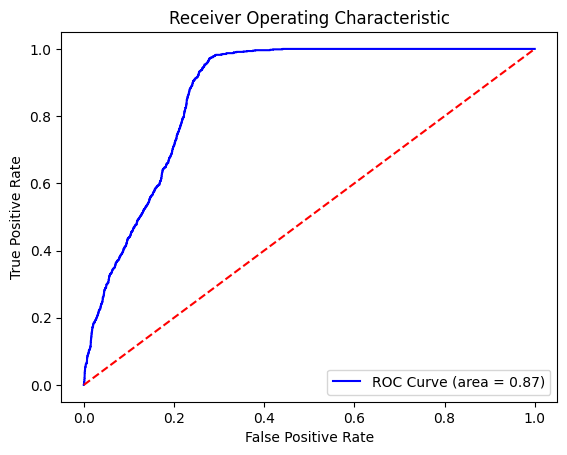

In [316]:
plot_roc(lr_model)

## Random Forest

In [357]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Random Forest Accuracy: {accuracy * 100:.2f}")
print(classification_report(y_test, y_pred, digits=4))

Random Forest Accuracy: 98.74
              precision    recall  f1-score   support

           0     0.9909    0.9954    0.9932      9182
           1     0.9442    0.8943    0.9186       795

    accuracy                         0.9874      9977
   macro avg     0.9676    0.9449    0.9559      9977
weighted avg     0.9872    0.9874    0.9872      9977



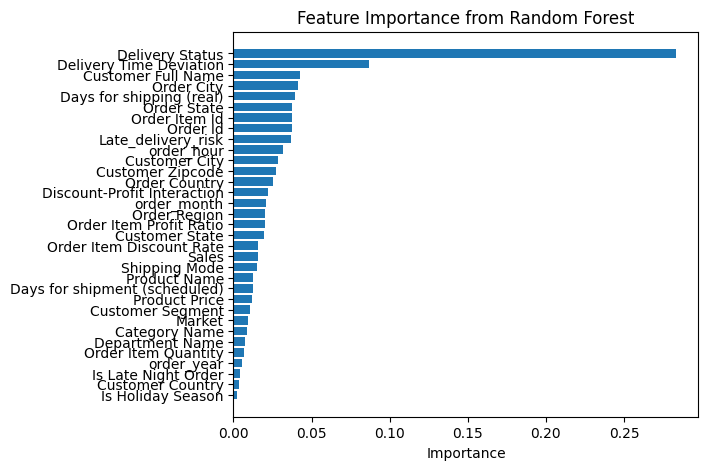

In [275]:
import pandas as pd
import matplotlib as plt

importances = rf_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)

import matplotlib.pyplot as plt
plt.figure(figsize=(6, 5))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

ROC-AUC Score: 0.9984057542169599


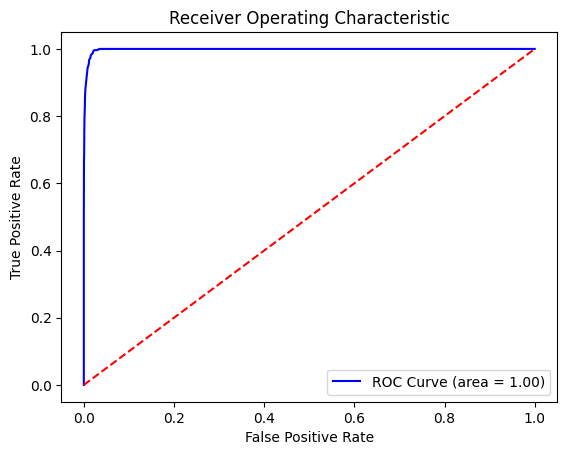

In [358]:
plot_roc(rf_model)

In [359]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Accuracy:", cv_scores.mean())

Cross-Validation Accuracy: 0.9791760222560655


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

In [360]:
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf, digits=4))

Best Parameters: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.9890748722060739
Classification Report:
               precision    recall  f1-score   support

           0     0.9926    0.9955    0.9941      9182
           1     0.9466    0.9145    0.9303       795

    accuracy                         0.9891      9977
   macro avg     0.9696    0.9550    0.9622      9977
weighted avg     0.9890    0.9891    0.9890      9977



## XGBoost

In [354]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

In [355]:
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy * 100:.2f}")
print(classification_report(y_test, y_pred_xgb, digits=4))

XGBoost Accuracy: 98.00
              precision    recall  f1-score   support

           0     0.9892    0.9890    0.9891      9182
           1     0.8733    0.8755    0.8744       795

    accuracy                         0.9800      9977
   macro avg     0.9312    0.9322    0.9317      9977
weighted avg     0.9800    0.9800    0.9800      9977



ROC-AUC Score: 0.995432682757761


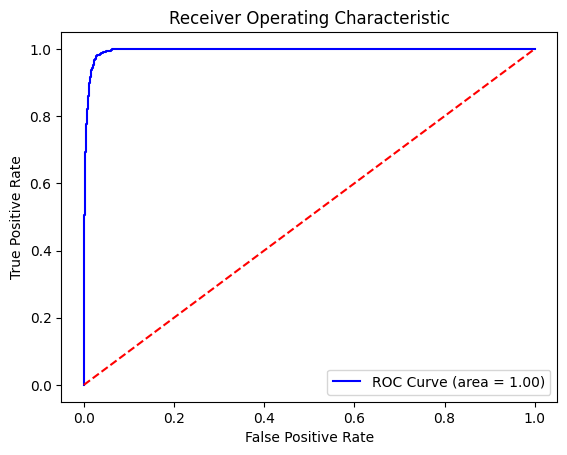

In [356]:
plot_roc(xgb_model)

In [340]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(xgb_model, X_train_smote, y_train_smote, cv=5, scoring='accuracy')

print("Cross-Validation Accuracy:", cv_scores.mean())

Cross-Validation Accuracy: 0.9450323981784837


## SVM

In [349]:
from sklearn.svm import SVC

svm_model = SVC(probability=True) 
svm_model.fit(X_train_smote, y_train_smote)

y_pred_svm = svm_model.predict(X_test)

In [351]:
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred_svm, digits=4))

SVM Accuracy: 59.45%
              precision    recall  f1-score   support

           0     0.9247    0.6089    0.7343      9182
           1     0.0865    0.4277    0.1439       795

    accuracy                         0.5945      9977
   macro avg     0.5056    0.5183    0.4391      9977
weighted avg     0.8579    0.5945    0.6873      9977



ROC-AUC Score: 0.5286717655133301


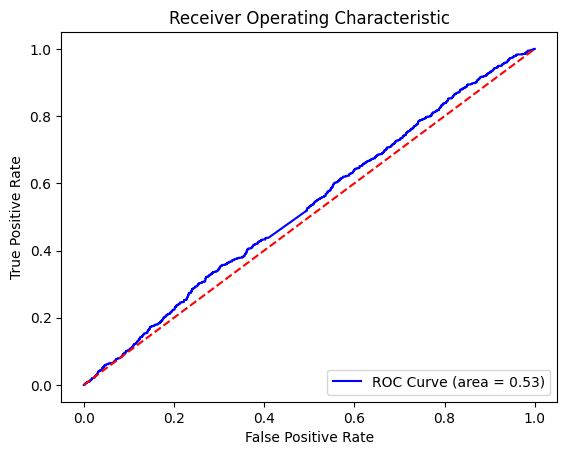

In [350]:
plot_roc(svm_model)

## KNN

In [284]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

Accuracy: 0.9261300992282249
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      9182
           1       0.55      0.39      0.46       795

    accuracy                           0.93      9977
   macro avg       0.75      0.68      0.71      9977
weighted avg       0.92      0.93      0.92      9977



## Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report

model = Sequential()

model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))

# Hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))  # Dropout for regularization
model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

y_pred_nn = model.predict(X_test)
y_pred_nn = (y_pred_nn > 0.5).astype(int)  # Convert probabilities to binary predictions

In [346]:
print("Accuracy:", accuracy_score(y_test, y_pred_nn))
print("Classification Report:\n", classification_report(y_test, y_pred_nn, digits=4))

Accuracy: 0.9203167284754936
Classification Report:
               precision    recall  f1-score   support

           0     0.9203    1.0000    0.9585      9182
           1     0.0000    0.0000    0.0000       795

    accuracy                         0.9203      9977
   macro avg     0.4602    0.5000    0.4793      9977
weighted avg     0.8470    0.9203    0.8821      9977



/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



312/312 [==============================] - 0s 1ms/step


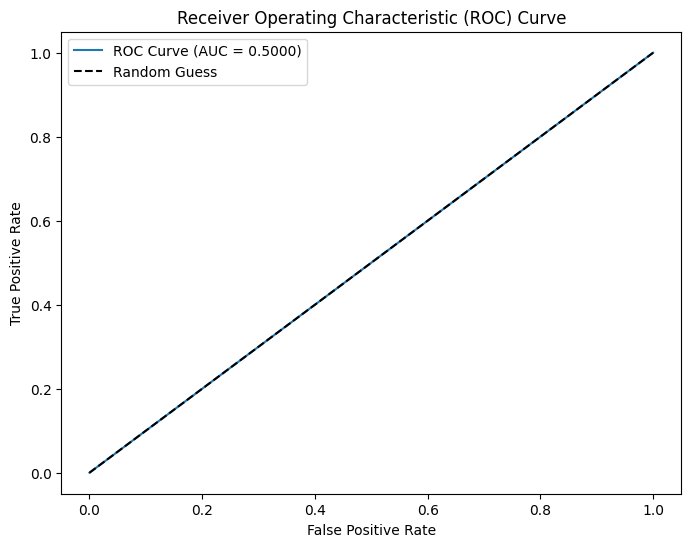

In [353]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_nn(model, X_test, y_test):
    y_prob = model.predict(X_test).ravel()  
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


plot_roc_nn(model, X_test, y_test)